# Программирование на языке Python для сбора и анализа данных

*Текст лекции: Щуров И.В., НИУ ВШЭ*

Данный notebook является конспектом лекции по курсу «Программирование на языке Python для сбора и анализа данных» (НИУ ВШЭ, 2015-16). Он распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0](http://creativecommons.org/licenses/by-sa/4.0/). При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса](http://math-info.hse.ru/s15/m). Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние](http://creativecommons.org/publicdomain/zero/1.0/).

Другие материалы курса, включая конспекты и видеозаписи лекций, а также наборы задач, можно найти на [странице курса](http://math-info.hse.ru/s15/m).

### Лекция 13: ещё о pandas

Эта история началась с невинного разговора о погоде. Примерно такого:

— Смотри-ка, сегодня 10-е марта, а за окном плюс семь. Прямо весна наступила неожиданно.

— Да… Ну, если март тёплый, значит, апрель будет холодный. Так всегда бывает.

— Правда? Сейчас проверим…

И я пошёл искать статистические данные по погоде в Москве. Они нашлись быстро — [вот здесь](http://cliware.meteo.ru/inter/data.html) можно взять информацию за последние 50 лет. Судя по заглавной странице, это система Всероссийского научно-исследовательского института гидрометеорологической информации — звучит внушительно. С помощью найденных данных и математической статистики мы не только проверим сформулированную выше «народную примету», но и получим довольно неожиданную информацию о связи погоды в разные месяцы, а также своими глазами посмотрим на глобальное потепление.

Поехали!

### Планируем
Мы нашли информацию о температуре за каждый день за последние 50 лет, но что мы теперь с ней будем делать? Чтобы подтвердить или опровергнуть нашу гипотезу, её надо переформулировать математически. Утверждение, «тепло в марте, значит, будет холодно в апреле», означает, что между двумя величинами — средней температурой за март и средней температурой за апрель — наблюдается *отрицательная корреляция*. То есть мы предполагаем, что в те года, в которые средняя температура за март была относительно высокой, средняя температура за апрель была относительно низкой. Конечно, всегда может встретиться аномальный год с жарким мартом и жарким апрелем — само по себе это не будет противоречить нашей гипотезе — но мы предполагаем, что такие случаи редки.

Чтобы проверить эту гипотезу, нам потребуется вычислить среднюю температуру за каждый из интересующих нас месяцев каждого из 50 лет и вычислить величину, которая называется [коэффициентом корреляции Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F#.D0.9A.D0.BE.D1.8D.D1.84.D1.84.D0.B8.D1.86.D0.B8.D0.B5.D0.BD.D1.82_.D0.BA.D0.BE.D1.80.D1.80.D0.B5.D0.BB.D1.8F.D1.86.D0.B8.D0.B8_.D0.9F.D0.B8.D1.80.D1.81.D0.BE.D0.BD.D0.B0). К счастью, нам даже не нужно знать, по какой формуле её считать (хотя это и полезно), поскольку Python посчитаёт её за нас. Самое главное — подготовить для этого данные.

### Грузим
Для анализа данных в Python используется модуль под милым названием `pandas`.

In [1]:
import pandas as pd

Чтобы загрузить эту таблицу в `pandas`, можно было скопировать её в какой-нибудь табличный процессор (например, Excel, Numbers или OpenOffice.org Calc), сохранить как CSV и загрузить с помощью `pd.read_csv`, но на самом деле всё проще: можно загружать сразу html-таблички.

Есть одна небольшая проблема: ссылка, упомянутая выше, указывает не на страницу с таблицей, а на форму — собственно табличку вы получаете после выбора параметров в форме и нажатия на кнопку, при этом сами параметры не передаются в адресной строке (это так называемый POST-запрос). Поэтому загрузить эти данные в `pandas`, просто подставив адрес нужной страницы, не удастся. Так что я сохранил html-файл на свой локальный компьютер. Потом мы обсуждали этот пример со студентами и, похоже, своими запросами временно «положили» источник данных, так что пришлось пользоваться [сохранённой копией](http://math-info.hse.ru/f/2014-15/nes-stat/climate.html) на страничке [нашего курса](http://math-info.hse.ru/s14/s).

Итак, данные у нас есть — поехали.

In [2]:
dat = pd.read_html("http://math-info.hse.ru/f/2014-15/nes-stat/climate.html", header=0)

Параметр `header=0` показывает, что нулевая (то есть первая) строчка должна использоваться как строка заголовков (имён переменных). Без него возникает множество технических проблем, которые, впрочем, тоже преодолимы. 

Одако, если вывести сейчас переменную `dat`, получится что-то не очень понятное — вместо красивой таблички нечто текстовое. А если попытаться работать с `dat` как с dataframe (так в `pandas`, вслед за `R`, называются таблицы с данными), то и вообще ничего не получится. Дело в том, что `dat` сейчас — не dataframe. А что же?

In [3]:
type(dat)

list

Логично. Это список. На html-страничке ведь может быть несколько таблиц. `pd.read_html` каждую из них поместит в свой dataframe и создаст список dataframe'ов. В нашем случае этот список очень простой. Если бы мы читали документацию, то сразу бы об этом узнали.

In [4]:
len(dat)

1

В нём всего один элемент. Извлечём его из списка и назовём тем же именем, что раньше называли список. (Сам список нам больше не понадобится.)

In [5]:
dat = dat[0]
dat.head(3)

,STATION_ID,STATION_NM,DATE_OBS,TMPMAX,Q,TMPMIN,Q.1,TMPMN,Q.2,PRECIP,Q.3,D
0,27612,МОСКВА ВДНХ,1948-01-01,NaN,9,NaN,9,NaN,9,NaN,9,9
1,27612,МОСКВА ВДНХ,1948-01-02,NaN,9,NaN,9,NaN,9,NaN,9,9
2,27612,МОСКВА ВДНХ,1948-01-03,NaN,9,NaN,9,NaN,9,NaN,9,9


Теперь в `dat` лежит честный dataframe. Часть столбцов имеют понятный без специальных пояснений смысл: `TMPMAX` — максимальная температура за день, `TMPMIN` — минимальная, `TMPMN` — средняя (от слова *mean*), `PRECIP` — уровень осадков (*precipitation*). Ещё есть непонятные столбцы `Q` и `D`, значения которых мне не ведомы. Название и идентификатор станции нам тоже не слишком нужны. От них можно избавиться, например, вот так.

In [6]:
dat.drop(['STATION_ID', 'STATION_NM', 'Q','Q.1','Q.2','Q.3','D'],inplace=True,axis=1)

Параметр `axis=1` означает, что нужно выкинуть столбцы, а не строки, `inplace=True` означает, что это нужно сделать «на месте», то есть модифицировать dataframe, а не вернуть его версию.

In [7]:
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
0,1948-01-01,NaN,NaN,NaN,NaN
1,1948-01-02,NaN,NaN,NaN,NaN
2,1948-01-03,NaN,NaN,NaN,NaN
3,1948-01-04,NaN,NaN,NaN,NaN
4,1948-01-05,NaN,NaN,NaN,NaN


В строчках за 1948 год нет никаких полезных данных и их надо бы выкинуть. Проще всего это сделать с помощью `.dropna` — это команда, выкидывающая строки (или столбцы, если вызывать с `axis=1`), в которых есть неопределенные ячейки (например, содержащие `NaN`).

In [8]:
dat.dropna(inplace=True)
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
345,1948-12-11,2.4,-4.5,-1.1,0.0
346,1948-12-12,1.9,-8.7,-6.2,0.5
347,1948-12-13,-7.4,-12.3,-10.1,0.0
348,1948-12-14,-5.6,-13.2,-9.4,0.0
349,1948-12-15,-3.6,-9.2,-6.6,0.0


Как видимо, 1948 год начинается не с начала и в нём есть только кусок декабря, так что мы его тоже, пожалуй, выкинем, от греха подальше. Я это сделал, просмотрев табличку вручную и заметив номер нужной мне строчки.

In [9]:
dat.loc[365:370]

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
365,1948-12-31,-1.2,-5.3,-2.3,0.0
366,1949-01-01,-2.1,-6.7,-4.2,0.0
367,1949-01-02,-0.5,-6.7,-1.2,4.2
368,1949-01-03,1.1,-2.1,-0.7,0.0
369,1949-01-04,3.3,0.9,2.3,0.0
370,1949-01-05,4.0,-0.9,1.1,0.8


In [10]:
dat.drop(range(345,366),inplace=True)
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
366,1949-01-01,-2.1,-6.7,-4.2,0.0
367,1949-01-02,-0.5,-6.7,-1.2,4.2
368,1949-01-03,1.1,-2.1,-0.7,0.0
369,1949-01-04,3.3,0.9,2.3,0.0
370,1949-01-05,4.0,-0.9,1.1,0.8


### Рисуем
Чтобы убедиться, что всё в порядке, нарисуем несколько картинок.

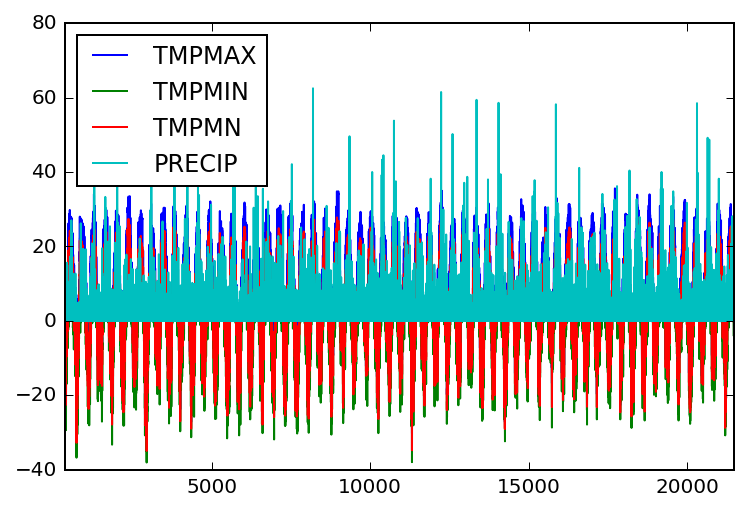

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
dat.plot();

Что-нибудь видно? Не очень. Это потому, что мы попытались вывести на одном графике четыре разных параметра, да ещё и за кучу лет. Давайте возьмём поменьше данных для визуализации.

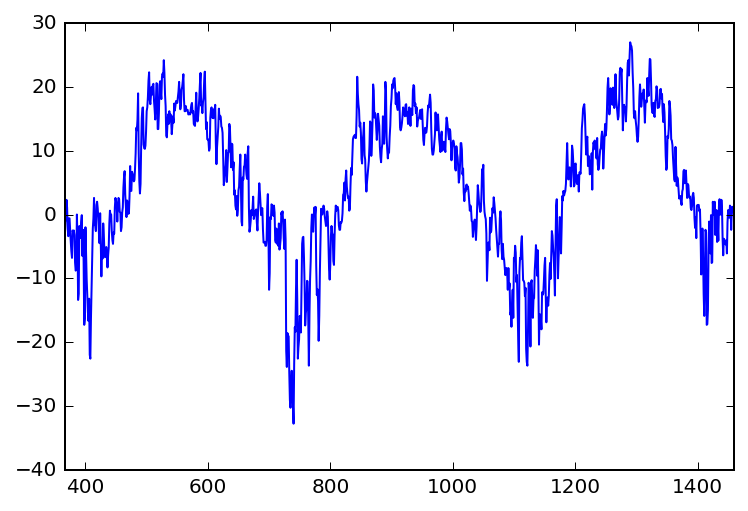

In [12]:
# только средняя температура и данные за три года
dat.iloc[0:365*3]['TMPMN'].plot();

Это график температуры за первые три года наблюдений.

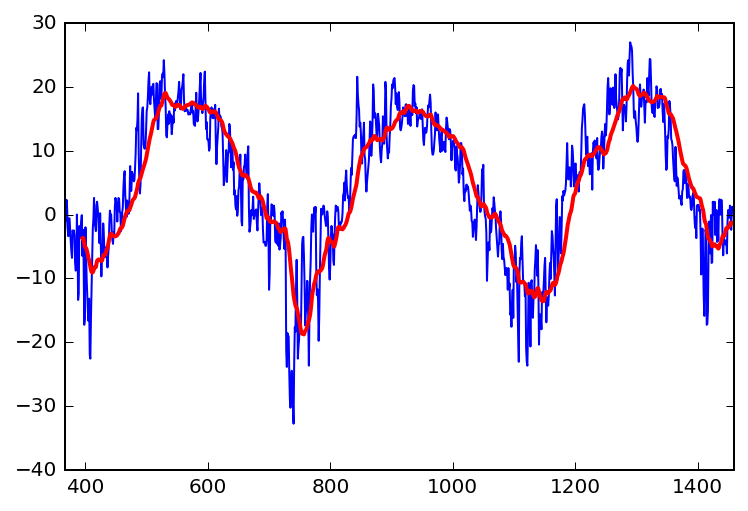

In [13]:
dat.iloc[0:365*3]['TMPMN'].plot()
pd.rolling_mean(dat.iloc[0:365*3]['TMPMN'],30).plot(lw=2,color='red');

А здесь на него наложено *скользящее среднее* (*rolling mean*) за месяц, сглаживающее резкие колебания.

Посмотрим, что происходит в масштабе десятилетий.

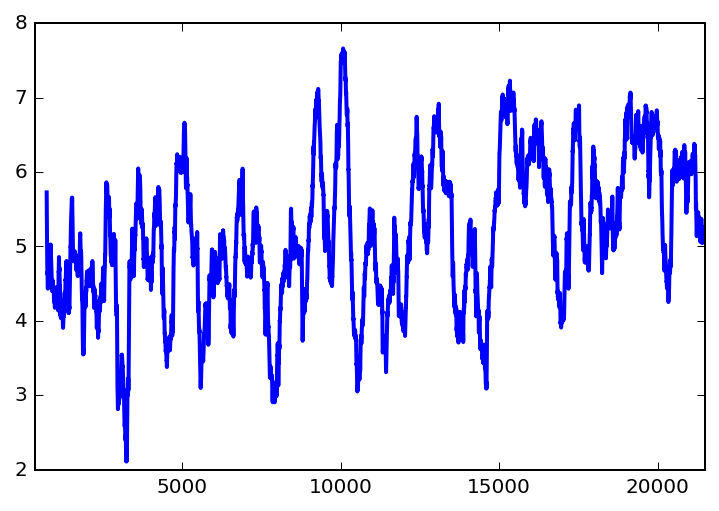

In [14]:
pd.rolling_mean(dat['TMPMN'],365).plot(lw=2,color='blue');

Здесь было сглаживание по годам.

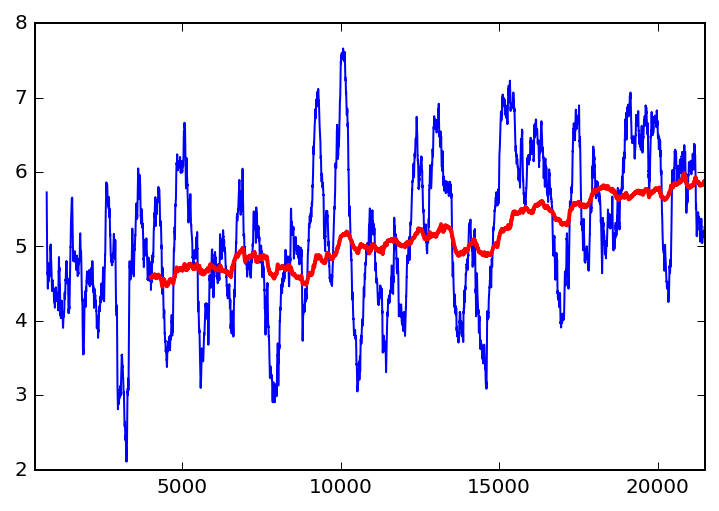

In [15]:
pd.rolling_mean(dat['TMPMN'],365).plot(color='blue')
pd.rolling_mean(dat['TMPMN'],3650).plot(lw=2,color='red');

Сглаживание по годам и десятилетиям на одной картинке.

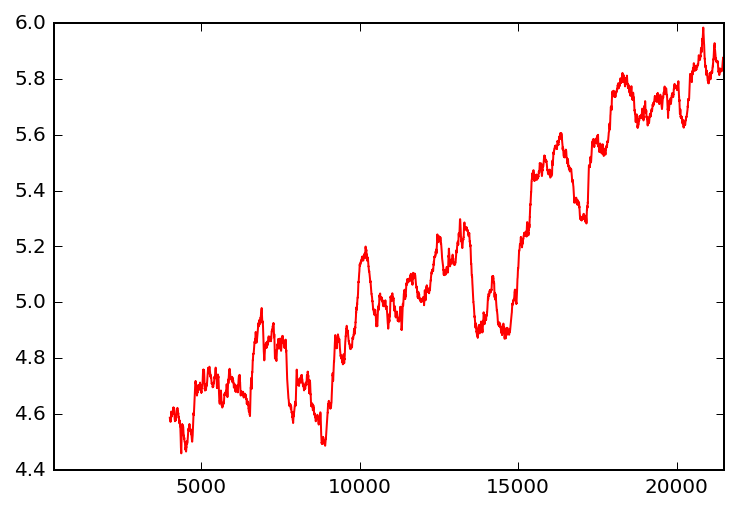

In [16]:
pd.rolling_mean(dat['TMPMN'],3650).plot(color='red');

И, наконец, красный график отдельно. Если вас когда-нибудь интресовал вопрос о том, есть или нет глобальное потепление, то теперь, наверное, он отпал. (Вообще-то такого вопроса нет: климат меняется и действительно теплеет; вопрос, который широко обсуждается — является ли это результатом действий челвоека или это естественный процесс. Но на него мы так сходу не ответим.)

### Упорядочиваем
Картинки красивые, но по вертикальной оси написана какая-то ерунда. Это потому, что строчки сейчас индексируются числами (да ещё и отсчёт начинается с 367). Для более разумного поведения было бы хорошо индексировать строчки датами из колонки `DATE_OBS`. В нашем случае проблема осложняется тем, что система не воспринимает эту колонку как колонку с датами. Давайте же решим эту проблему.

In [17]:
dat['DATE_OBS'] = pd.to_datetime(dat['DATE_OBS'])
dat['DATE_OBS']

366     1949-01-01
367     1949-01-02
368     1949-01-03
369     1949-01-04
370     1949-01-05
371     1949-01-06
372     1949-01-07
373     1949-01-08
374     1949-01-09
375     1949-01-10
376     1949-01-11
377     1949-01-12
378     1949-01-13
379     1949-01-14
380     1949-01-15
381     1949-01-16
382     1949-01-17
383     1949-01-18
384     1949-01-19
385     1949-01-20
386     1949-01-21
387     1949-01-22
388     1949-01-23
389     1949-01-24
390     1949-01-25
391     1949-01-26
392     1949-01-27
393     1949-01-28
394     1949-01-29
395     1949-01-30
           ...    
21459   2006-10-02
21460   2006-10-03
21461   2006-10-04
21462   2006-10-05
21463   2006-10-06
21464   2006-10-07
21465   2006-10-08
21466   2006-10-09
21467   2006-10-10
21468   2006-10-11
21469   2006-10-12
21470   2006-10-13
21471   2006-10-14
21472   2006-10-15
21473   2006-10-16
21474   2006-10-17
21475   2006-10-18
21476   2006-10-19
21477   2006-10-20
21478   2006-10-21
21479   2006-10-22
21480   2006

Мы видим `dtype: datetime64`, что означает, что теперь типом данных являются даты. Сделаем теперь этот столбец индексом.

In [18]:
dat.index=dat['DATE_OBS']
dat.head()

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
DATE_OBS,,,,,
1949-01-01,1949-01-01,-2.1,-6.7,-4.2,0.0
1949-01-02,1949-01-02,-0.5,-6.7,-1.2,4.2
1949-01-03,1949-01-03,1.1,-2.1,-0.7,0.0
1949-01-04,1949-01-04,3.3,0.9,2.3,0.0
1949-01-05,1949-01-05,4.0,-0.9,1.1,0.8


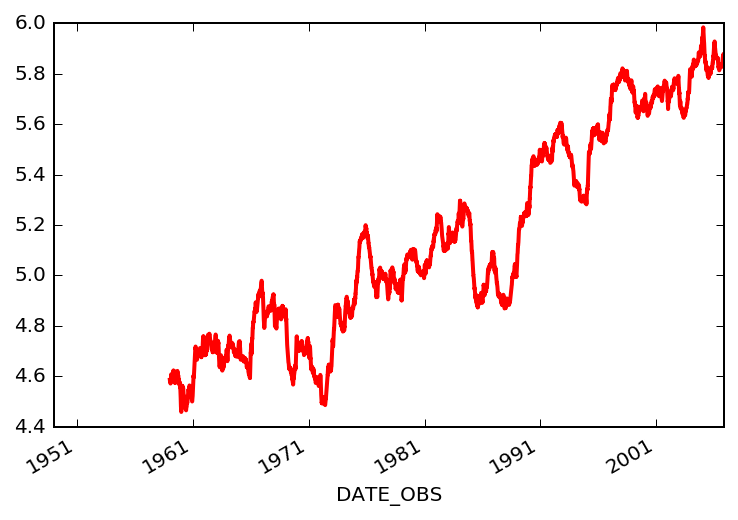

In [19]:
pd.rolling_mean(dat['TMPMN'],3650).plot(lw=2,color='red');

Теперь горизонтальная ось подписана верно. Кстати, срезы с датами тоже работают.

In [20]:
from datetime import datetime
dat[datetime(2001,1,25):datetime(2001,2,5)]

,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
DATE_OBS,,,,,
2001-01-25,2001-01-25,-6.6,-14.8,-11.0,0.0
2001-01-26,2001-01-26,-3.5,-8.7,-5.3,0.7
2001-01-27,2001-01-27,-0.4,-4.5,-2.5,2.7
2001-01-28,2001-01-28,1.4,-0.4,0.8,3.7
2001-01-29,2001-01-29,2.9,0.8,1.4,1.1
2001-01-30,2001-01-30,1.5,-0.1,0.6,1.4
2001-01-31,2001-01-31,0.1,-1.8,-0.7,0.6
2001-02-01,2001-02-01,-1.7,-7.4,-4.5,0.0
2001-02-02,2001-02-02,-3.0,-12.3,-8.1,13.2


### Усредняем
Впрочем, мы отвлеклись. Вернёмся к нашей задаче: верно ли, что более тёплый март — это признак того, что апрель будет более холодным? Иными словами, правда ли, что средняя температура за март и апрель отрицательно скоррелированы? Чтобы это понять, нам потребуется сформировать новую таблицу, в которой наблюдением (то есть строчкой) будет один год, а переменными (то есть столбцами) будет средняя температура за каждый месяц.

Для начала добавим в нашу таблицу столбцы, соответствующие году, месяцу и дню.

In [21]:
dat['Year']=dat.index.year
dat['Mon']=dat.index.month
dat['Day']=dat.index.day
dates=dat[['Year','Mon','Day']]
dates.head()

,Year,Mon,Day
DATE_OBS,,,
1949-01-01,1949,1,1
1949-01-02,1949,1,2
1949-01-03,1949,1,3
1949-01-04,1949,1,4
1949-01-05,1949,1,5


Теперь переопределим индекс более удобным для нас образом.

In [22]:
dat.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)

Предыдущей командой мы создали так называемый *мультииндекс*, то есть индекс с несколькими измерениями. Простейший пример мультииндекса из математики — индекс у матрицы $a_{i,j}$. Можно считать $i$ и $j$ двумя разными индексами, а можно считать пару $(i,j)$ одним мульииндексом. Мультииндекс — способ записать в обычную таблицу многомерную информацию. В данном случае у нас в мультииндексе три измерения — год, месяц, день. Вот так теперь выглядит наш dataframe.

In [23]:
dat.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP  Year  Mon  Day
Year Mon Day                                                          
1949 1   1   1949-01-01    -2.1    -6.7   -4.2     0.0  1949    1    1
         2   1949-01-02    -0.5    -6.7   -1.2     4.2  1949    1    2
         3   1949-01-03     1.1    -2.1   -0.7     0.0  1949    1    3
         4   1949-01-04     3.3     0.9    2.3     0.0  1949    1    4
         5   1949-01-05     4.0    -0.9    1.1     0.8  1949    1    5

Нам нужно для каждого года и каждого месяца найти среднюю температуру за этот месяц. Для этого следует сгруппировать элемены таблички по году и месяцу и к тому, что получилось, применить метод `.mean()`.

In [24]:
year_day_mean=dat.groupby(level=[0,1]).mean()
year_day_mean.head()

TMPMAX     TMPMIN      TMPMN    PRECIP  Year  Mon   Day
Year Mon                                                            
1949 1    -1.300000  -6.493548  -3.670968  0.854839  1949    1  16.0
     2    -3.571429 -11.075000  -7.339286  0.789286  1949    2  14.5
     3     1.390323  -6.470968  -2.780645  2.419355  1949    3  16.0
     4     9.056667  -0.066667   4.280000  0.603333  1949    4  15.5
     5    21.377419   9.093548  15.225806  1.016129  1949    5  16.0

Почти то, что нужно. Теперь оставим лишь интересующий нас параметр — среднюю температуру за день (усредненную потом ещё и за месяц), то есть `TMPMN`.

In [25]:
tmpmn=year_day_mean['TMPMN']
tmpmn.head()

Year  Mon
1949  1      -3.670968
      2      -7.339286
      3      -2.780645
      4       4.280000
      5      15.225806
Name: TMPMN, dtype: float64

И сделаем из одномерной таблицы с мультииндексом двумерную таблицу с обычными одномерными индексами:

In [26]:
mon_mean=tmpmn.unstack()
mon_mean.head()

/usr/local/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


Mon,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1949,-3.670968,-7.339286,-2.780645,4.280000,15.225806,16.973333,17.425806,16.074194,11.506667,4.800000,-0.423333,-4.322581
1950,-18.022581,-6.764286,-2.225806,9.043333,11.738710,15.123333,16.177419,14.080645,11.990000,4.745161,-0.433333,-5.503226
1951,-12.138710,-12.264286,-3.996774,8.403333,9.738710,17.706667,18.590323,18.325806,11.990000,2.780645,-4.810000,-1.251613
1952,-4.135484,-7.096552,-9.106452,5.166667,10.358065,17.340000,17.870968,16.848387,12.136667,3.925806,-1.133333,-5.883871
1953,-10.403226,-15.614286,-2.606452,7.183333,11.645161,19.193333,19.025806,17.290323,10.046667,5.790323,-3.156667,-5.632258


Вот теперь совсем то, что нужно! Дадим месяцам осмысленные имена.

In [27]:
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul',
                  'Aug','Sep','Oct','Nov','Dec']

### Считаем!
Барабанная дробь! Торжественный момент: мы наконец можем посчитать интересующие нас корреляции! Та-дам!

In [28]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.384755,0.257302,0.216484,0.047153,0.039691,0.206568,-0.120758,0.134955,0.117936,-0.142560,-0.059667
Feb,0.384755,1.000000,0.379095,0.216300,0.017000,0.028284,0.252928,-0.097432,0.033740,0.071301,0.059700,-0.012276
Mar,0.257302,0.379095,1.000000,0.328143,0.071455,0.177538,0.091281,0.022202,-0.081379,-0.037189,-0.031521,-0.075481
Apr,0.216484,0.216300,0.328143,1.000000,0.041331,0.017182,0.159124,-0.117359,0.028134,0.037973,0.077483,0.000211
May,0.047153,0.017000,0.071455,0.041331,1.000000,-0.121644,0.028159,0.118944,0.038196,0.178622,0.175155,-0.156485
Jun,0.039691,0.028284,0.177538,0.017182,-0.121644,1.000000,0.306204,0.093280,-0.060803,0.111169,-0.370548,0.150160
Jul,0.206568,0.252928,0.091281,0.159124,0.028159,0.306204,1.000000,0.411425,0.131770,0.132230,0.000195,0.053797
Aug,-0.120758,-0.097432,0.022202,-0.117359,0.118944,0.093280,0.411425,1.000000,0.222137,0.179547,0.123741,0.002483
Sep,0.134955,0.033740,-0.081379,0.028134,0.038196,-0.060803,0.131770,0.222137,1.000000,0.277824,0.077645,0.054884
Oct,0.117936,0.071301,-0.037189,0.037973,0.178622,0.111169,0.132230,0.179547,0.277824,1.000000,0.146520,-0.031469


На табличку с цифрами смотреть не очень приятно, так что мы лучше нарисуем картинку.

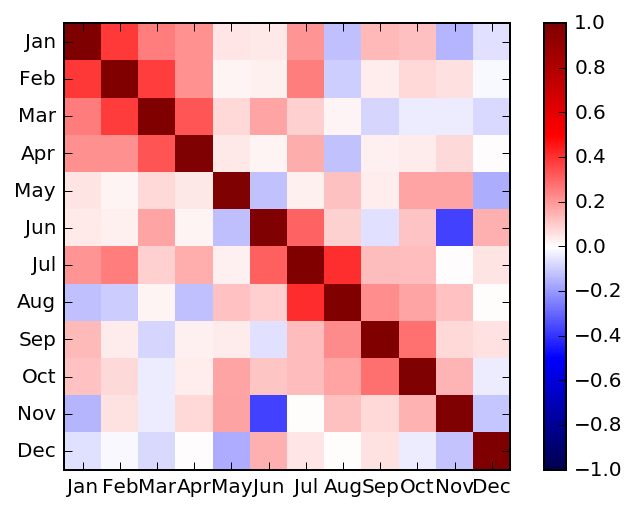

In [29]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns);

Красные квадратики означают положительную корреляцию, синие — отрицательную. Как видим, исходное утверждение «если март тёплый, то апрель будет холодным», подтвердилось с точностью до наоборот — корреляция положительная. А вот между июнем и ноябрём — отрицательная. (Интересно, почему так? Это действительно есть такой эффект или просто артефакт наших данных?)

Проиллюстрируем утверждение о корреляциях на графиках, которые называются точечными диаграммами или диаграммами рассеяния (scatter plot).

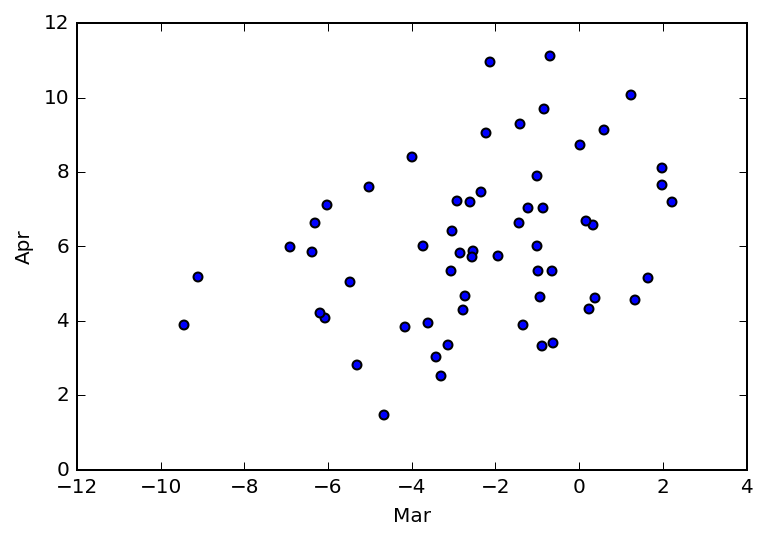

In [30]:
mon_mean.plot(kind='scatter',x='Mar',y='Apr');

Каждая точка на графике — это один год, по горизонтальной оси отмечена средняя температура за март, а по вертикальной — за апрель. Видно, что график немного вытянут вдоль диагонали, которая идёт «из левого нижнего угла в правый верхний» — это и соответствует наличию положительной корреляции.

А вот аналогичный график для пары июнь — ноябрь:

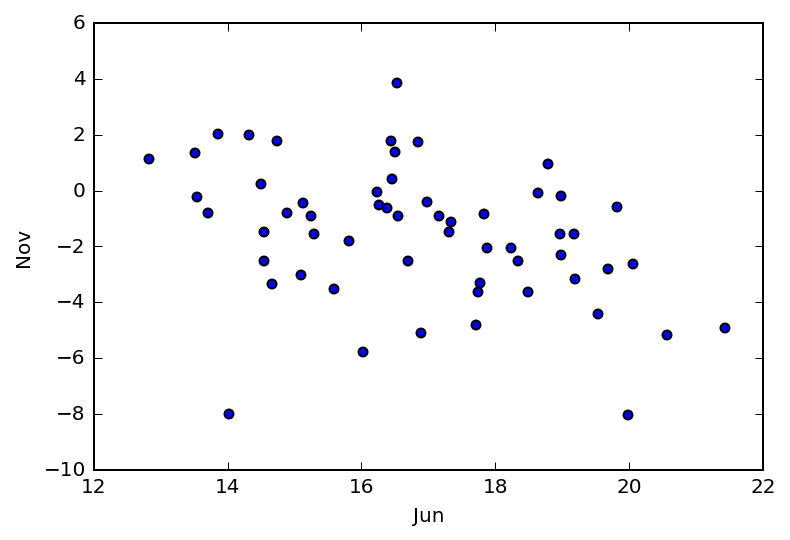

In [31]:
mon_mean.plot(kind='scatter',x='Jun',y='Nov');

### Постскриптум
— Неправда твоя! Данные ясно показывают, что если март тёплый, то и апрель тёплый.

— Не верю что-то.

— У меня статистика за 50 лет.

— А у меня личный опыт! Вот, помню, несколько лет назад ноябрь был тёплый, а декабрь холодный…

— Ну, у ноября с декабрём как раз отрицательная корреляция.

— Вот! Я же говорил! Я был прав!

### Вопросы для размышления
1. На сколько градусов растёт в среднем температура за один год? (Посчитать регрессию с помощью `statsmodels`.)
2. На сколько градусов вырастет в среднем температура в апреле, если она выросла на 1 градус в марте? 
3. А на сколько она упадёт в ноябре, если она выросла на один градус в декабре? 
4. Значимы ли коэффициенты регрессий в этих задачах?
5. А если учесть [поправку на множественные сравнения](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)?
6. Известна поговорка «после дождичка в четверг» (о маловероятном событии). Проверить с помощью теста Стьюдента, отличается ли статистически значимо уровень осадков (`PRECIP`), выпадающих по четвергам, от уровня осадков в остальные дни недели? (Подсказка: `dat.index.weekday`.)
7. Положительную корреляцию можно объяснить глобальным потеплением: более тёплый апрель скорее всего попадает в более позднюю часть выборки и ему соответствует более тёплый май и остальные месяцы. Скорректировать результаты с учётом наличия глобального потепления. 